### Data Analysis of IPL players to find Top players

In [285]:
import numpy as np
import pandas as pd

In [286]:
ipl=pd.read_csv("/content/IPL_Data.csv")

In [287]:
ipl.head()

,Name,Team,Url,Type,ValueinCR,Full Name,Born,Age,National Side,Batting Style,...,Maidens,RunsConceded,Wickets,Best,3s,5s,BowlingAVG,EconomyRate,S/R,Mtc
0,Mayank Agarwal,PBKS,https://sports.ndtv.com/cricket/players/1430-m...,Batsman,12.00,Mayank Anurag Agarwal,"February 16, 1991 Bangalore, Karnataka","31 Years, 0 Months, 28 Days",India,Right Handed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Liam Livingstone,PBKS,https://sports.ndtv.com/cricket/players/64363-...,All-Rounder,11.50,Liam Stephen Livingstone,"August 4, 1993 Barrow-in-Furness, Cumberland","28 Years, 7 Months, 11 Days",England,Right Handed,...,0.0,13.0,0.0,0/13 v MI,0.0,0.0,NaN,13.00,NaN,1.0
2,Kagiso Rabada,PBKS,https://sports.ndtv.com/cricket/players/64042-...,Bowler,9.25,Kagiso Rabada,"May 25, 1995 Johannesburg","26 Years, 9 Months, 22 Days",South Africa,Left Handed,...,2.0,1560.0,76.0,4/21 v RCB,4.0,0.0,20.52,8.21,15.0,50.0
3,Shahrukh Khan,PBKS,https://sports.ndtv.com/cricket/players/113433...,All-Rounder,9.00,Masood Shahrukh Khan,"May 27, 1995 Chennai, Tamil Nadu","26 Years, 9 Months, 20 Days",India,Right Handed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Shikhar Dhawan,PBKS,https://sports.ndtv.com/cricket/players/737-sh...,Batsman,8.25,Shikhar Dhawan,"December 5, 1985 Delhi","36 Years, 3 Months, 10 Days",India,Left Handed,...,0.0,66.0,4.0,1/7 v DC,0.0,0.0,16.50,8.25,12.0,6.0


In [288]:
ipl.columns

Index(['Name', 'Team', 'Url', 'Type', 'ValueinCR', 'Full Name', 'Born', 'Age',
       'National Side', 'Batting Style', 'Bowling', 'Sport', 'MatchPlayed',
       'InningsBatted', 'NotOuts', 'RunsScored', 'HighestInnScore', '100s',
       '50s', '4s', '6s', 'BattingAVG', 'BattingS/R', 'CatchesTaken',
       'StumpingsMade', 'Ducks', 'R/O', 'InningsBowled', 'Overs', 'Maidens',
       'RunsConceded', 'Wickets', 'Best', '3s', '5s', 'BowlingAVG',
       'EconomyRate', 'S/R', 'Mtc'],
      dtype='object')

# Batting

In [289]:
mask = ipl['Type'].values == 'Batsman '
batting = ipl[mask]
batting.head(3)

,Name,Team,Url,Type,ValueinCR,Full Name,Born,Age,National Side,Batting Style,...,Maidens,RunsConceded,Wickets,Best,3s,5s,BowlingAVG,EconomyRate,S/R,Mtc
0,Mayank Agarwal,PBKS,https://sports.ndtv.com/cricket/players/1430-m...,Batsman,12.00,Mayank Anurag Agarwal,"February 16, 1991 Bangalore, Karnataka","31 Years, 0 Months, 28 Days",India,Right Handed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Shikhar Dhawan,PBKS,https://sports.ndtv.com/cricket/players/737-sh...,Batsman,8.25,Shikhar Dhawan,"December 5, 1985 Delhi","36 Years, 3 Months, 10 Days",India,Left Handed,...,0.0,66.0,4.0,1/7 v DC,0.0,0.0,16.5,8.25,12.0,6.0
15,Bhanuka Rajapaksa,PBKS,https://sports.ndtv.com/cricket/players/43735-...,Batsman,0.50,Pramod Bhanuka Bandara Rajapaksa,"October 24, 1991","30 Years, 4 Months, 23 Days",Sri Lanka,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [290]:
bat_df=batting[['Name','MatchPlayed',
       'InningsBatted', 'NotOuts', 'RunsScored', '100s',
       '50s', '4s', '6s', 'BattingAVG', 'BattingS/R', 'CatchesTaken','Ducks', 'R/O',]]

In [291]:
bat_df.head()

,Name,MatchPlayed,InningsBatted,NotOuts,RunsScored,100s,50s,4s,6s,BattingAVG,BattingS/R,CatchesTaken,Ducks,R/O
0,Mayank Agarwal,100.0,95.0,4.0,2131.0,1.0,11.0,203.0,85.0,23.41,135.47,40.0,6.0,4.0
4,Shikhar Dhawan,192.0,191.0,25.0,5784.0,2.0,44.0,654.0,124.0,34.84,126.64,82.0,11.0,16.0
15,Bhanuka Rajapaksa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,Kane Williamson,63.0,62.0,15.0,1885.0,0.0,17.0,165.0,56.0,40.10,131.26,29.0,1.0,3.0
28,Rahul Tripathi,62.0,60.0,7.0,1385.0,0.0,7.0,136.0,48.0,26.13,136.31,23.0,1.0,4.0


In [292]:
bat_df.fillna(0,inplace=True)
bat_df=bat_df[bat_df.BattingAVG>0]

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [293]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Batsman Name')

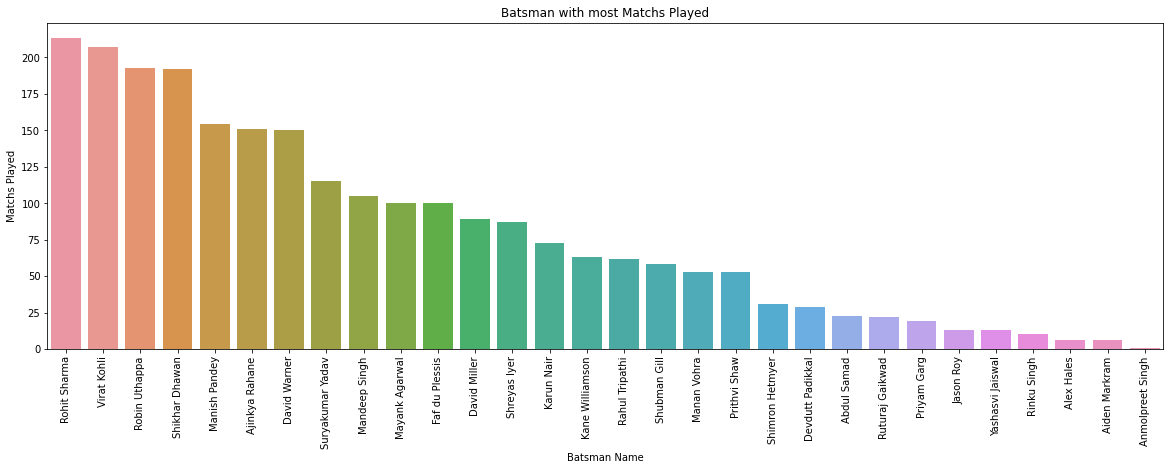

In [294]:
bat_sorted = bat_df.sort_values('MatchPlayed',ascending=False)
fig, ax = plt.subplots(figsize=(20,6))
ax.set_xticklabels(bat_sorted.Name, rotation=90)
sns.barplot(bat_sorted.Name,bat_sorted.MatchPlayed)
ax.set_ylabel("Matchs Played")
ax.set_title("Batsman with most Matchs Played")
ax.set_xlabel('Batsman Name')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Batsman Name')

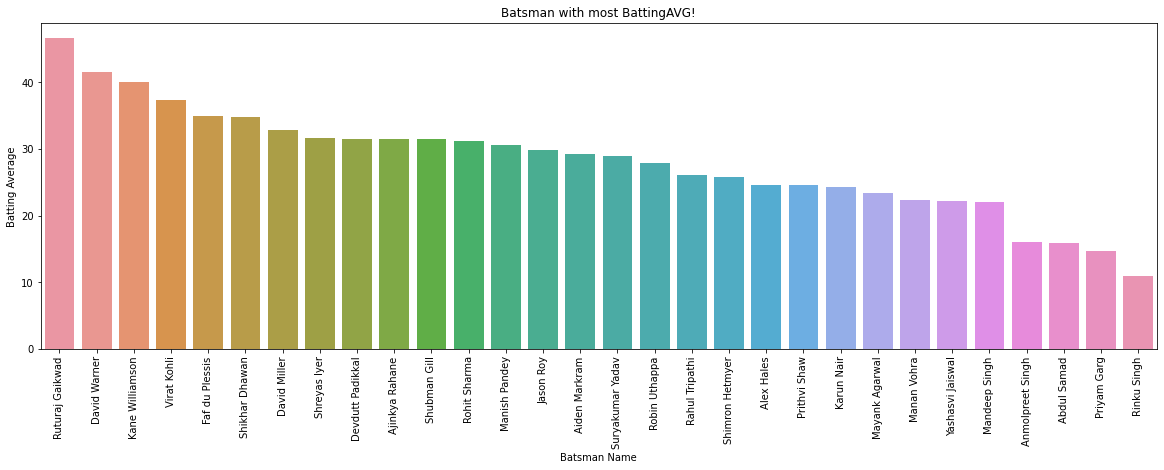

In [295]:
bat_sorted = bat_df.sort_values('BattingAVG',ascending=False)
fig, ax = plt.subplots(figsize=(20,6))
ax.set_xticklabels(bat_sorted.Name, rotation=90)
sns.barplot(bat_sorted.Name,bat_sorted.BattingAVG)
ax.set_ylabel("Batting Average")
ax.set_title("Batsman with most BattingAVG!")
ax.set_xlabel('Batsman Name')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Batsman Name')

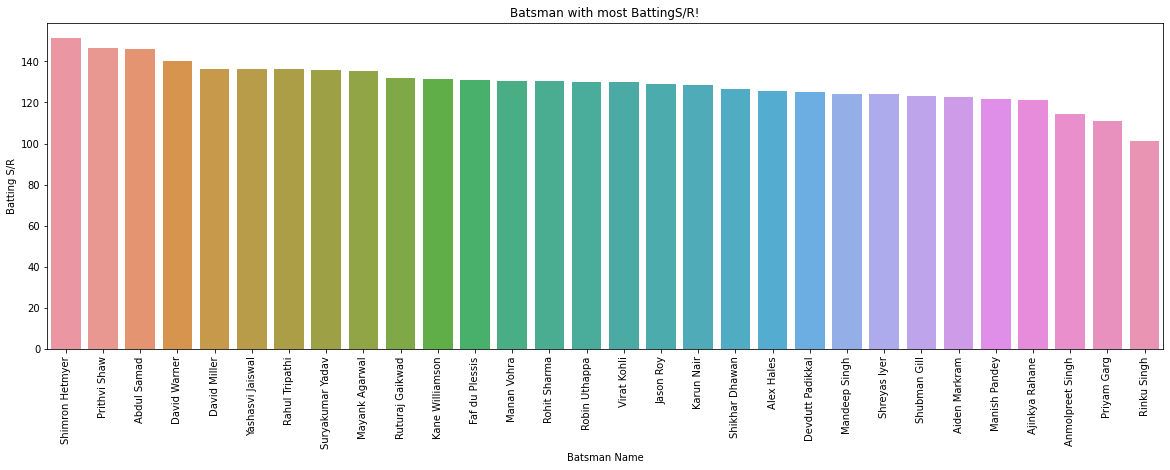

In [296]:
bat_sorted = bat_df.sort_values('BattingS/R',ascending=False)
fig, ax = plt.subplots(figsize=(20,6))
ax.set_xticklabels(bat_sorted.Name, rotation=90)
sns.barplot(bat_sorted.Name,bat_sorted['BattingS/R'])
ax.set_ylabel("Batting S/R")
ax.set_title("Batsman with most BattingS/R!")
ax.set_xlabel('Batsman Name')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Batsman Name')

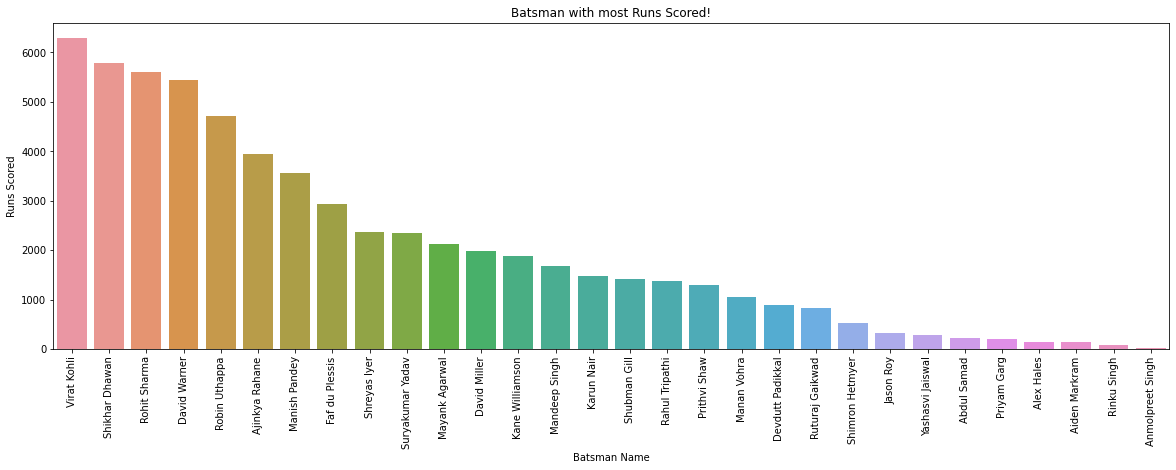

In [297]:
bat_sorted = bat_df.sort_values('RunsScored',ascending=False)
fig, ax = plt.subplots(figsize=(20,6))
ax.set_xticklabels(bat_sorted.Name, rotation=90)
sns.barplot(bat_sorted.Name,bat_sorted['RunsScored'])
ax.set_ylabel("Runs Scored")
ax.set_title("Batsman with most Runs Scored!")
ax.set_xlabel('Batsman Name')

## Top 5 batsman

In [298]:
bat_df.sort_values(by = ['MatchPlayed',
       'InningsBatted', 'NotOuts', 'RunsScored', '100s',
       '50s', '4s', '6s', 'BattingAVG', 'BattingS/R', 'CatchesTaken',], ascending = [False,False,False,False,False,False,False,False,False,False,False]).head(5)

,Name,MatchPlayed,InningsBatted,NotOuts,RunsScored,100s,50s,4s,6s,BattingAVG,BattingS/R,CatchesTaken,Ducks,R/O
94,Rohit Sharma,213.0,208.0,28.0,5611.0,1.0,40.0,491.0,227.0,31.17,130.39,90.0,13.0,11.0
72,Virat Kohli,207.0,199.0,31.0,6283.0,5.0,42.0,546.0,210.0,37.39,129.94,84.0,6.0,7.0
128,Robin Uthappa,193.0,186.0,17.0,4722.0,0.0,25.0,462.0,168.0,27.94,130.15,87.0,7.0,9.0
4,Shikhar Dhawan,192.0,191.0,25.0,5784.0,2.0,44.0,654.0,124.0,34.84,126.64,82.0,11.0,16.0
201,Manish Pandey,154.0,143.0,27.0,3560.0,1.0,21.0,309.0,103.0,30.68,121.83,75.0,13.0,6.0


# Bowling

In [299]:
mask = ipl['Type'].values == 'Bowler '
bowling = ipl[mask]
bowling.head(3)

,Name,Team,Url,Type,ValueinCR,Full Name,Born,Age,National Side,Batting Style,...,Maidens,RunsConceded,Wickets,Best,3s,5s,BowlingAVG,EconomyRate,S/R,Mtc
2,Kagiso Rabada,PBKS,https://sports.ndtv.com/cricket/players/64042-...,Bowler,9.25,Kagiso Rabada,"May 25, 1995 Johannesburg","26 Years, 9 Months, 22 Days",South Africa,Left Handed,...,2.0,1560.0,76.0,4/21 v RCB,4.0,0.0,20.52,8.21,15.00,50.0
7,Rahul Chahar,PBKS,https://sports.ndtv.com/cricket/players/107512...,Bowler,5.25,Rahul Desraj Chahar,"August 4, 1999 Bharaatpur, Rajasthan","22 Years, 7 Months, 12 Days",India,Right Handed,...,0.0,1117.0,43.0,4/27 v KKR,3.0,0.0,25.97,7.44,20.93,41.0
8,Arshdeep Singh,PBKS,https://sports.ndtv.com/cricket/players/108557...,Bowler,4.00,Arshdeep Singh,"February 5, 1999 Guna, Madhya Pradesh","23 Years, 1 Months, 8 Days",India,Left Handed,...,1.0,669.0,30.0,5/32 v RR,3.0,1.0,22.30,8.78,15.23,23.0


In [300]:
bowl_df=bowling[['Name','InningsBowled', 'Overs', 'Maidens',
       'RunsConceded', 'Wickets', '3s', '5s', 'BowlingAVG',
       'EconomyRate', 'S/R', 'Mtc']]

In [301]:
bowl_df.head()

,Name,InningsBowled,Overs,Maidens,RunsConceded,Wickets,3s,5s,BowlingAVG,EconomyRate,S/R,Mtc
2,Kagiso Rabada,50.0,190.0,2.0,1560.0,76.0,4.0,0.0,20.52,8.21,15.00,50.0
7,Rahul Chahar,41.0,150.0,0.0,1117.0,43.0,3.0,0.0,25.97,7.44,20.93,41.0
8,Arshdeep Singh,23.0,76.1,1.0,669.0,30.0,3.0,1.0,22.30,8.78,15.23,23.0
10,Vaibhav Arora,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,Nathan Ellis,3.0,11.0,0.0,90.0,1.0,0.0,0.0,90.00,8.18,66.00,3.0


In [302]:
bowl_df.fillna(0,inplace=True)
bowl_df=bowl_df[bowl_df.BowlingAVG>0]

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Bowler Name')

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


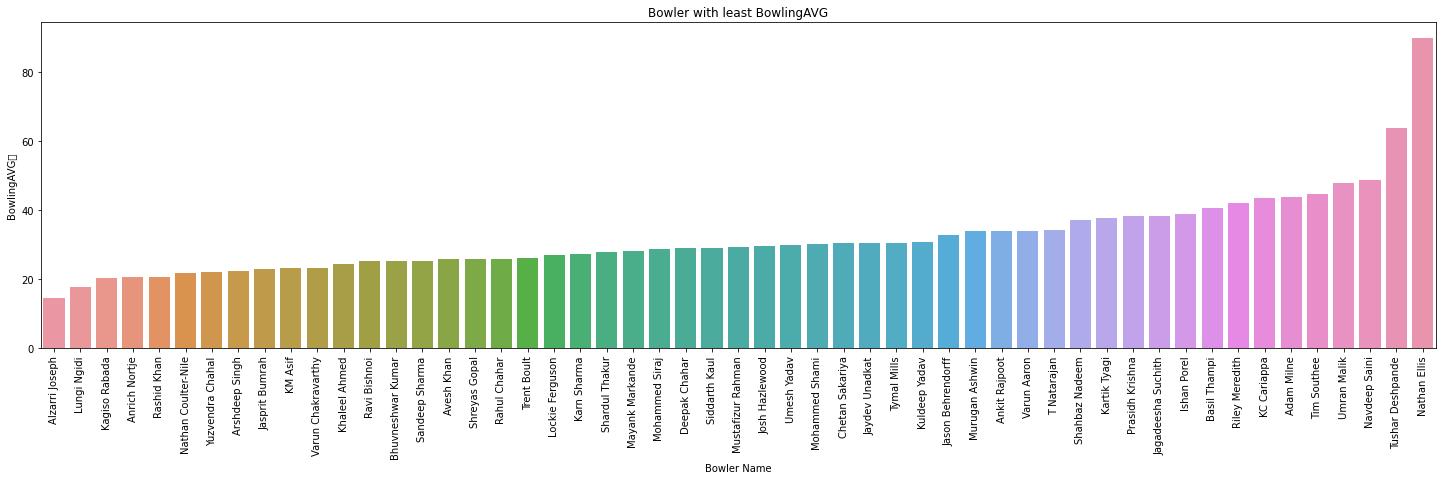

In [303]:
bowl_sorted = bowl_df.sort_values('BowlingAVG',ascending=True)
fig, ax = plt.subplots(figsize=(25,6))
ax.set_xticklabels(bowl_sorted.Name, rotation=90)
sns.barplot(bowl_sorted.Name,bowl_sorted.BowlingAVG)
ax.set_ylabel("BowlingAVG	")
ax.set_title("Bowler with least BowlingAVG")
ax.set_xlabel('Bowler Name')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Bowler Name')

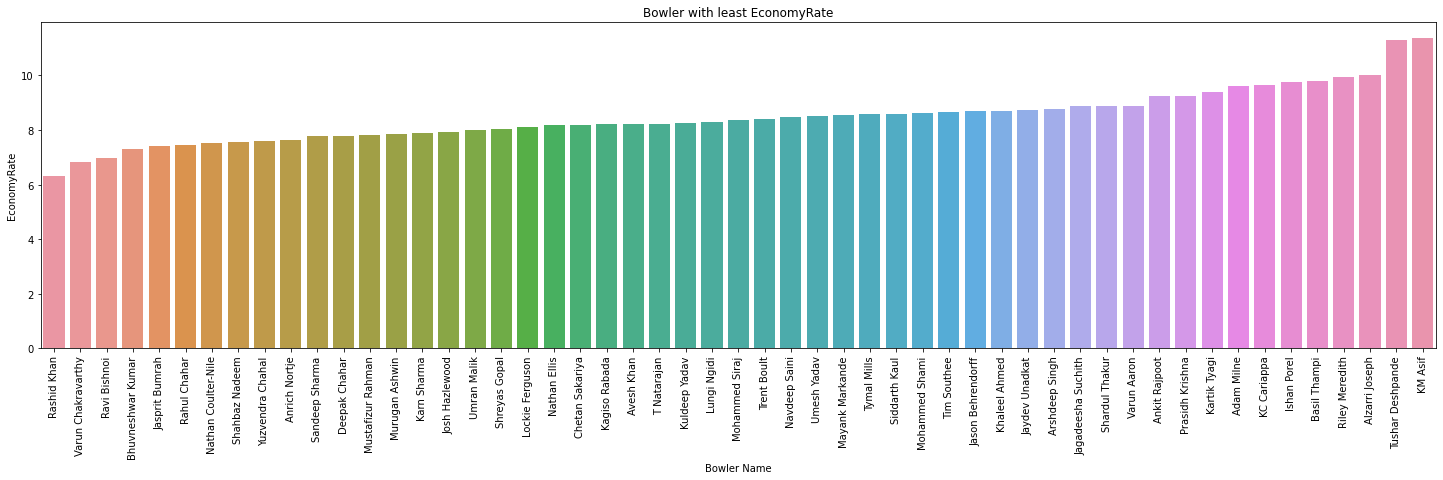

In [305]:
bowl_sorted = bowl_df.sort_values('EconomyRate',ascending=True)
fig, ax = plt.subplots(figsize=(25,6))
ax.set_xticklabels(bowl_sorted.Name, rotation=90)
sns.barplot(bowl_sorted.Name,bowl_sorted.EconomyRate)
ax.set_ylabel("EconomyRate")
ax.set_title("Bowler with least EconomyRate")
ax.set_xlabel('Bowler Name')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Bowler Name')

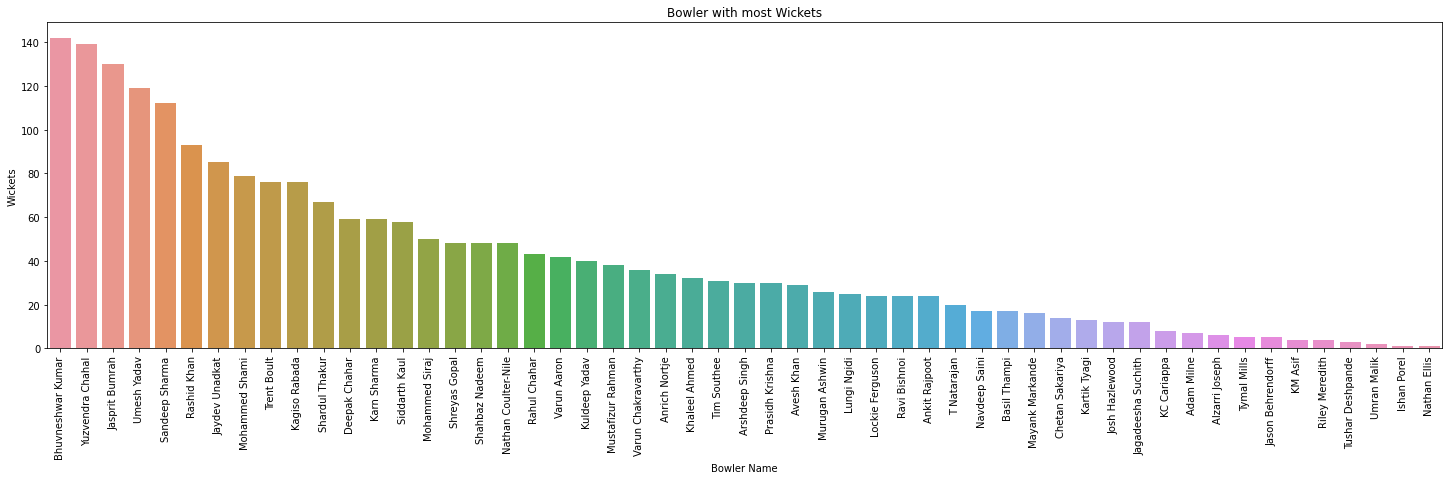

In [306]:
bowl_sorted = bowl_df.sort_values('Wickets',ascending=False)
fig, ax = plt.subplots(figsize=(25,6))
ax.set_xticklabels(bowl_sorted.Name, rotation=90)
sns.barplot(bowl_sorted.Name,bowl_sorted.Wickets)
ax.set_ylabel("Wickets")
ax.set_title("Bowler with most Wickets")
ax.set_xlabel('Bowler Name')

# Top 5 Bowlers

In [307]:
bowl_df.sort_values(by = ['InningsBowled', 'Overs', 'Maidens',
       'RunsConceded', 'Wickets', '3s', '5s', 'BowlingAVG',
       'EconomyRate', 'S/R', 'Mtc',], ascending = [False,False,False,True,False,False,False,True,True,True,False]).head(5)

,Name,InningsBowled,Overs,Maidens,RunsConceded,Wickets,3s,5s,BowlingAVG,EconomyRate,S/R,Mtc
31,Bhuvneshwar Kumar,132.0,491.3,9.0,3588.0,142.0,9.0,1.0,25.26,7.30,20.76,132.0
152,Umesh Yadav,120.0,420.2,3.0,3579.0,119.0,12.0,0.0,30.07,8.51,21.19,120.0
54,Yuzvendra Chahal,113.0,408.0,4.0,3097.0,139.0,9.0,0.0,22.28,7.59,17.61,113.0
96,Jasprit Bumrah,106.0,403.4,5.0,2997.0,130.0,14.0,0.0,23.05,7.42,18.63,106.0
16,Sandeep Sharma,99.0,366.2,8.0,2849.0,112.0,9.0,0.0,25.43,7.77,19.62,99.0


# All Rounder

In [308]:
mask = ipl['Type'].values == 'All-Rounder '
all = ipl[mask]
all.head(3)

,Name,Team,Url,Type,ValueinCR,Full Name,Born,Age,National Side,Batting Style,...,Maidens,RunsConceded,Wickets,Best,3s,5s,BowlingAVG,EconomyRate,S/R,Mtc
1,Liam Livingstone,PBKS,https://sports.ndtv.com/cricket/players/64363-...,All-Rounder,11.5,Liam Stephen Livingstone,"August 4, 1993 Barrow-in-Furness, Cumberland","28 Years, 7 Months, 11 Days",England,Right Handed,...,0.0,13.0,0.0,0/13 v MI,0.0,0.0,NaN,13.0,NaN,1.0
3,Shahrukh Khan,PBKS,https://sports.ndtv.com/cricket/players/113433...,All-Rounder,9.0,Masood Shahrukh Khan,"May 27, 1995 Chennai, Tamil Nadu","26 Years, 9 Months, 20 Days",India,Right Handed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Odean Smith,PBKS,https://sports.ndtv.com/cricket/players/108548...,All-Rounder,6.0,Odean Fabian Smith,"November 1, 1996 St. Elizabeth, Jamaica","25 Years, 4 Months, 14 Days",West Indies,Right Handed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [309]:
all_df=all.drop(['Team','Url','Batting Style','Bowling','ValueinCR','HighestInnScore','Best','Sport','Full Name','Born', 'Age','National Side','StumpingsMade'],axis=1)

In [310]:
all_df.head()

,Name,Type,MatchPlayed,InningsBatted,NotOuts,RunsScored,100s,50s,4s,6s,...,Overs,Maidens,RunsConceded,Wickets,3s,5s,BowlingAVG,EconomyRate,S/R,Mtc
1,Liam Livingstone,All-Rounder,9.0,9.0,1.0,112.0,0.0,0.0,9.0,6.0,...,1.0,0.0,13.0,0.0,0.0,0.0,NaN,13.00,NaN,1.0
3,Shahrukh Khan,All-Rounder,11.0,10.0,3.0,153.0,0.0,0.0,9.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Odean Smith,All-Rounder,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Harpreet Brar,All-Rounder,10.0,6.0,6.0,84.0,0.0,0.0,5.0,3.0,...,32.0,1.0,228.0,5.0,1.0,0.0,45.6,7.12,38.4,10.0
11,Raj Bawa,All-Rounder,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [311]:
all_df.fillna(0,inplace=True)

In [312]:
all_df=all_df[all_df.BattingAVG>0]
all_df=all_df[all_df.BowlingAVG>0]

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Batsman Name')

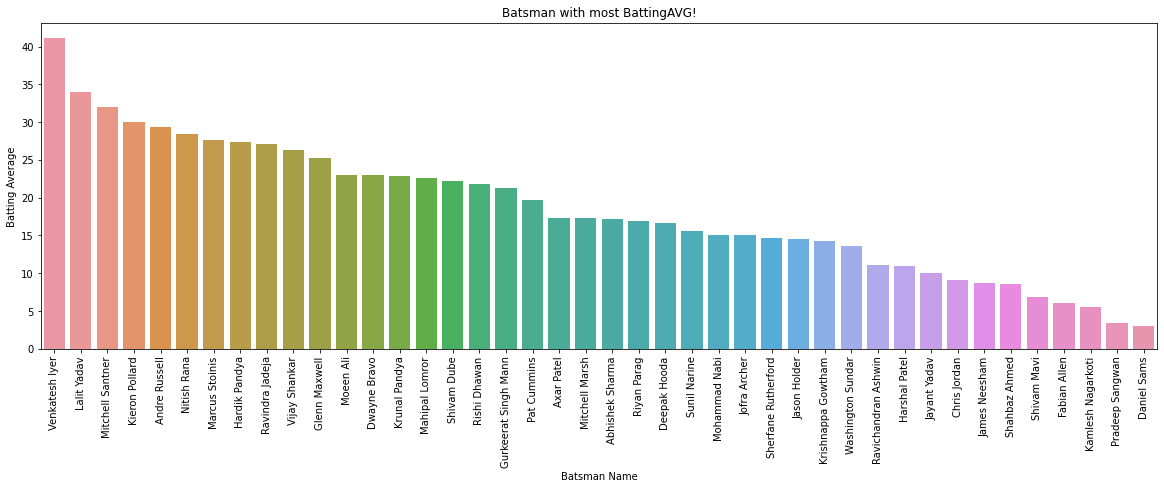

In [313]:
all_sorted = all_df.sort_values('BattingAVG',ascending=False)
fig, ax = plt.subplots(figsize=(20,6))
ax.set_xticklabels(all_sorted.Name, rotation=90)
sns.barplot(all_sorted.Name,all_sorted.BattingAVG)
ax.set_ylabel("Batting Average")
ax.set_title("Batsman with most BattingAVG!")
ax.set_xlabel('Batsman Name')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Bowler Name')

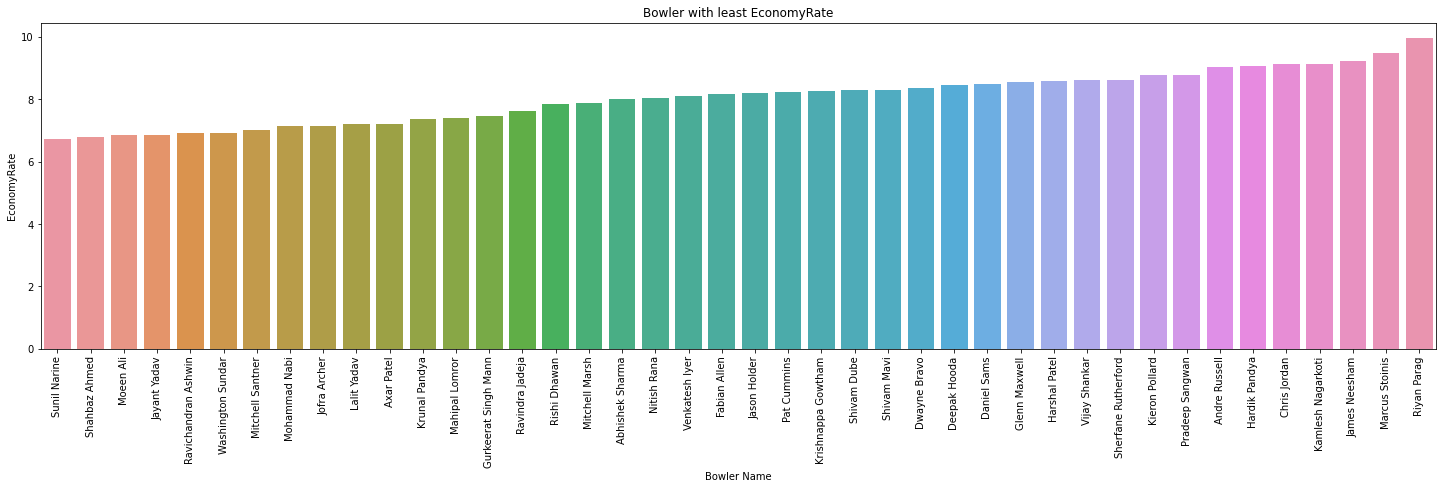

In [314]:
all_sorted = all_df.sort_values('EconomyRate',ascending=True)
fig, ax = plt.subplots(figsize=(25,6))
ax.set_xticklabels(all_sorted.Name, rotation=90)
sns.barplot(all_sorted.Name,all_sorted.EconomyRate)
ax.set_ylabel("EconomyRate")
ax.set_title("Bowler with least EconomyRate")
ax.set_xlabel('Bowler Name')

## Top 5 All rounders

In [315]:
all_df.sort_values(by = ['MatchPlayed',
       'InningsBatted', 'NotOuts', 'RunsScored', '100s',
       '50s', '4s', '6s', 'BattingAVG', 'BattingS/R', 'CatchesTaken','InningsBowled', 'Overs', 'Maidens',
       'RunsConceded', 'Wickets', '3s', '5s', 'BowlingAVG',
       'EconomyRate', 'S/R', 'Mtc',], ascending = [False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,True,True,False]).head(5)

,Name,Type,MatchPlayed,InningsBatted,NotOuts,RunsScored,100s,50s,4s,6s,...,Overs,Maidens,RunsConceded,Wickets,3s,5s,BowlingAVG,EconomyRate,S/R,Mtc
119,Ravindra Jadeja,All-Rounder,200.0,151.0,63.0,2386.0,0.0,2.0,176.0,85.0,...,501.1,2.0,3816.0,127.0,8.0,1.0,30.04,7.61,23.67,171.0
100,Kieron Pollard,All-Rounder,178.0,160.0,51.0,3268.0,0.0,16.0,212.0,214.0,...,234.0,0.0,2055.0,65.0,2.0,0.0,31.61,8.78,21.60,101.0
55,Ravichandran Ashwin,All-Rounder,167.0,63.0,22.0,456.0,0.0,0.0,37.0,12.0,...,583.0,4.0,4031.0,145.0,6.0,0.0,27.80,6.91,24.12,164.0
125,Dwayne Bravo,All-Rounder,151.0,107.0,40.0,1537.0,0.0,5.0,119.0,65.0,...,485.3,2.0,4061.0,167.0,12.0,0.0,24.31,8.36,17.44,148.0
151,Sunil Narine,All-Rounder,134.0,76.0,15.0,954.0,0.0,4.0,106.0,57.0,...,520.1,3.0,3508.0,143.0,6.0,1.0,24.53,6.74,21.82,133.0


# Wicket Keeper

In [316]:
mask = ipl['Type'].values == 'Wicket-Keeper ' 
wicket= ipl[mask]
wicket.head(3)

,Name,Team,Url,Type,ValueinCR,Full Name,Born,Age,National Side,Batting Style,...,Maidens,RunsConceded,Wickets,Best,3s,5s,BowlingAVG,EconomyRate,S/R,Mtc
5,Jonny Bairstow,PBKS,https://sports.ndtv.com/cricket/players/1551-j...,Wicket-Keeper,6.75,Jonathan Marc Bairstow,"September 26, 1989 Bradford, Yorkshire","32 Years, 5 Months, 19 Days",England,Right Handed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,Prabhsimran Singh,PBKS,https://sports.ndtv.com/cricket/players/110976...,Wicket-Keeper,0.60,Prabhsimran Singh,"August 10, 2000","21 Years, 7 Months, 5 Days",India,Right Handed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,Jitesh Sharma,PBKS,https://sports.ndtv.com/cricket/players/106754...,Wicket-Keeper,0.20,Jitesh Mohan Sharma,"October 22, 1993 Amrawati, Maharashtra","28 Years, 4 Months, 24 Days",India,Right Handed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [317]:
wicket.columns

Index(['Name', 'Team', 'Url', 'Type', 'ValueinCR', 'Full Name', 'Born', 'Age',
       'National Side', 'Batting Style', 'Bowling', 'Sport', 'MatchPlayed',
       'InningsBatted', 'NotOuts', 'RunsScored', 'HighestInnScore', '100s',
       '50s', '4s', '6s', 'BattingAVG', 'BattingS/R', 'CatchesTaken',
       'StumpingsMade', 'Ducks', 'R/O', 'InningsBowled', 'Overs', 'Maidens',
       'RunsConceded', 'Wickets', 'Best', '3s', '5s', 'BowlingAVG',
       'EconomyRate', 'S/R', 'Mtc'],
      dtype='object')

In [318]:
wicket_df=wicket[['Name','MatchPlayed',
       'InningsBatted', 'NotOuts', 'RunsScored', '100s',
       '50s', '4s', '6s', 'BattingAVG', 'BattingS/R', 'CatchesTaken','Ducks', 'R/O','CatchesTaken',
       'StumpingsMade']]

In [320]:
wicket_df.fillna(0,inplace=True)
wicket_df=wicket_df[wicket_df.BattingAVG>0]
wicket_df.head()

,Name,MatchPlayed,InningsBatted,NotOuts,RunsScored,100s,50s,4s,6s,BattingAVG,BattingS/R,CatchesTaken,Ducks,R/O,CatchesTaken,StumpingsMade
5,Jonny Bairstow,28.0,28.0,3.0,1038.0,1.0,7.0,99.0,46.0,41.52,142.19,18.0,2.0,0.0,18.0,4.0
13,Prabhsimran Singh,5.0,5.0,0.0,50.0,0.0,0.0,4.0,2.0,10.00,90.90,2.0,0.0,0.0,2.0,0.0
26,Nicholas Pooran,33.0,31.0,4.0,606.0,0.0,2.0,35.0,44.0,22.44,154.98,11.0,5.0,1.0,11.0,0.0
39,Glenn Phillips,3.0,3.0,1.0,26.0,0.0,0.0,1.0,2.0,13.00,78.78,1.0,0.0,0.0,1.0,0.0
42,Vishnu Vinod,3.0,3.0,0.0,19.0,0.0,0.0,1.0,1.0,6.33,73.07,0.0,0.0,1.0,0.0,2.0


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Wicket keeper Name')

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


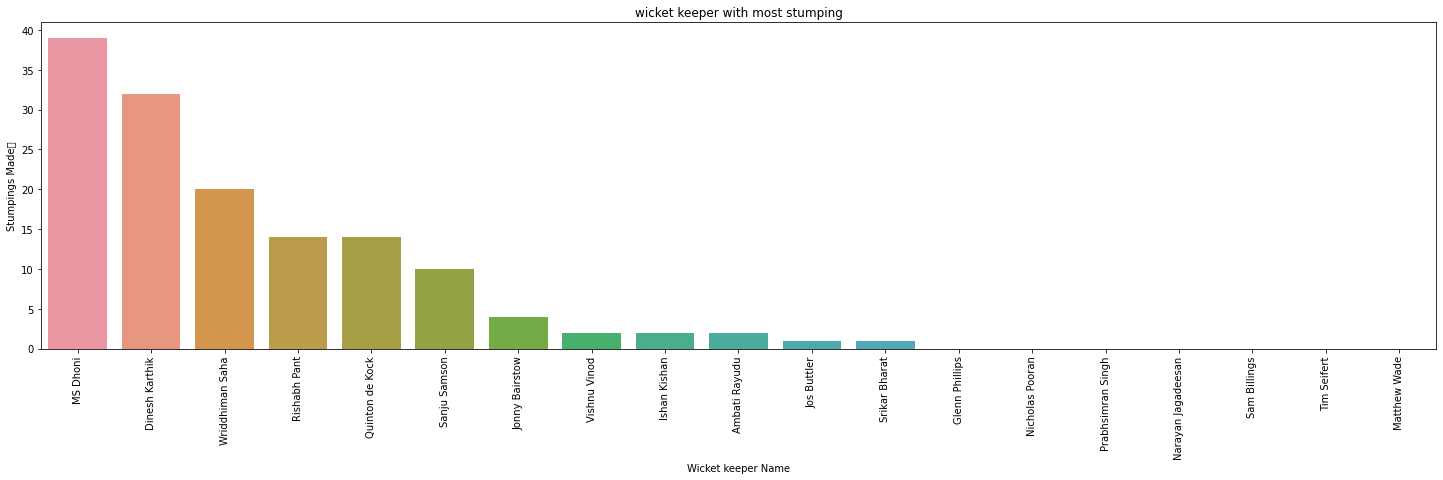

In [321]:
wicket_sorted = wicket_df.sort_values('StumpingsMade',ascending=False)
fig, ax = plt.subplots(figsize=(25,6))
ax.set_xticklabels(wicket_sorted.Name, rotation=90)
sns.barplot(wicket_sorted.Name,wicket_sorted.StumpingsMade)
ax.set_ylabel("Stumpings Made	")
ax.set_title("wicket keeper with most stumping")
ax.set_xlabel('Wicket keeper Name')

## Top 5 Wicket Keepers

In [284]:
wicket_df.sort_values(by = ['MatchPlayed',
       'InningsBatted', 'NotOuts', 'RunsScored', '100s',
       '50s', '4s', '6s', 'BattingAVG', 'BattingS/R',
       'StumpingsMade'], ascending = [False,False,False,False,False,False,False,False,False,False,False]).head(5)

,Name,MatchPlayed,InningsBatted,NotOuts,RunsScored,100s,50s,4s,6s,BattingAVG,BattingS/R,CatchesTaken,Ducks,R/O,CatchesTaken,StumpingsMade
121,MS Dhoni,220.0,193.0,73.0,4746.0,0.0,23.0,325.0,219.0,39.55,135.83,126.0,5.0,9.0,126.0,39.0
79,Dinesh Karthik,213.0,192.0,35.0,4046.0,0.0,19.0,399.0,112.0,25.77,129.72,123.0,14.0,12.0,123.0,32.0
123,Ambati Rayudu,175.0,164.0,31.0,3916.0,1.0,21.0,324.0,149.0,29.44,127.47,58.0,14.0,14.0,58.0,2.0
227,Wriddhiman Saha,133.0,108.0,22.0,2110.0,1.0,8.0,191.0,69.0,24.53,128.73,69.0,6.0,8.0,69.0,20.0
48,Sanju Samson,121.0,117.0,12.0,3068.0,3.0,15.0,236.0,132.0,29.21,134.20,59.0,8.0,6.0,59.0,10.0
